# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# matplotlib for visualization
import matplotlib.pyplot as plt
# change datetime
import datetime
import seaborn as sns

In [2]:
# read the data
try: 
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


#### <font color='Purple'>Student's commentary:</font> Done <a class="tocSkip">

In [3]:
# using head() to see the first few rows of the dataframe
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
# see the datatype using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# see the shape of the data
df.shape

(51525, 13)

In [6]:
# check the missing value
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusion

After doing some general analysis of the dataset, we observe that there are some float data type that we need to covert to integer; the data has 51525 rows and 13 columns; 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is4wd' has missing data.

## Data preprocessing

### Processing Missing Values

In [7]:
# caculate the percentage of missing value 
df.isnull().sum() * 100 / len(df)


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

We noticed there are 5 columns have missing values. In 'is4wd', particularly, half of the values are missing.

In [8]:
# see the statistical info of our data
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:
# we replace missing values in 'is_4wd' with 0.
df['is_4wd'].fillna(0, inplace = True)
df['is_4wd'].unique()

array([1., 0.])

In [10]:
# drop missing values in 'model_year' and 'cylinders'
df = df.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)


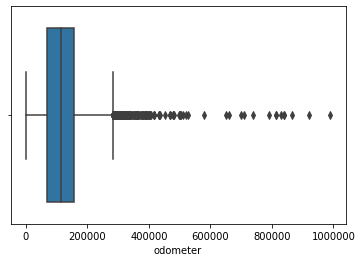

In [11]:
# using plots to determine how to deal with missing values in 'odometer' column
sns.boxplot(df.odometer);

From the boxplot we can see that the odometer data is skewed, there are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, we will use median for replacing the missing values. 

In [12]:
# replace missing values in 'odometer' with the median value
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [13]:
# fill missing values in 'paint_color' with 'others'
df['paint_color'] = df['paint_color'].fillna(value = 'others')

In [14]:
# now we don't have missing values
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

- In 'is_4wd' column, we can imply that 0 means not 4wd and 1 means is 4wd. We can assume the missing value in 'is_4wd' means vehicles are not 4wd.
- Since the number of missing values in 'model_year' and 'cylinders' is less than 10%, we would drop missing values in this columns. 
- The 'odometer' column contains significant outliers, as the standard deviation is huge, so we will replace the missing value with the median of the column.
- We will replace the missing values in 'paint_color' with 'others', because median value does not exist in categorical variables.

### Conclusion

We identified the missing values of this dataset by using different method to handling them. For categorical value, we replace missing value with the median value; for quantitative value, we replace missing value with 'others'. Moreover, for column with small portion of missing values, we drop them. Lastly, for column with boolean values (0:False 1: True), we replace missing values with 0s. 

### Change Data Type

In [15]:
# see the data types
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

We need to convert columns ('model_year', 'cylinders', 'odometer', 'is_4wd') with floats to integers.

In [16]:
# convert these columns to integers.
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')
df['is_4wd'] = df['is_4wd'].astype('bool')

In [17]:
# now we don't have columns with float data types.
df.dtypes

price            int64
model_year       int64
model           object
condition       object
cylinders        int64
fuel            object
odometer         int64
transmission    object
type            object
paint_color     object
is_4wd            bool
date_posted     object
days_listed      int64
dtype: object

### Conclusion

We convert columns with float data types to integers using .astype() method.

## Make calculations and add them to the table

### Replace string values with a numeric scale

In [18]:
# In the condition column, replace string values with a numeric scale: 
# new = 5 like new = 4 excellent = 3 good = 2 fair = 1 salvage = 0
df['condition'] = df['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

### Calculate and add day of the week, month, and year the ad was placed

In [19]:
# first change 'date_posted' to the datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')


In [20]:
# Add day of the week, month, and year columns to the dateset
df['dayofweek'] = df['date_posted'].dt.day_name()
df['week'] = df['date_posted'].dt.week
df['month'] = df['date_posted'].dt.month_name()
df['year'] = df['date_posted'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,Saturday,25,June,2018
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,6,February,2019
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,False,2019-03-22,9,Friday,12,March,2019
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,14,April,2019
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,25,June,2018


### Calculate and add the vehicle's age (in years) when the ad was placed

In [21]:
# The vehicle's age is the year when the ad was placed subtract vehicle's model year
df['vehicle_age'] = df['year'] - df['model_year']

### Calculate and add the vehicle's average mileage per year

In [22]:
# replace 0s in 'vehicle_age' with 1, avoiding infinite numbers in the next steps
df['vehicle_age'] = df['vehicle_age'].replace(0, 1)

In [23]:
# Average mileage per year is vehicle's odometer divided by vehicle's age
df['avg_mile'] = df['odometer'] / df['vehicle_age']

In [24]:
# check if there exists any absurd statistics value of our columns
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,week,year,vehicle_age,avg_mile
count,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000
mean,12168.670604,2009.761073,2.637053,6.126276,114967.597038,39.573671,26.936827,2018.306471,8.590481,19362.105882
std,10019.342590,6.266108,0.713040,1.659540,59882.186015,28.180113,15.138336,0.461033,6.219468,17258.645363
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,78840.000000,19.000000,13.000000,2018.000000,4.000000,10307.692308
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,28.000000,2018.000000,7.000000,15081.363636
75%,16900.000000,2014.000000,3.000000,8.000000,146345.000000,53.000000,40.000000,2019.000000,12.000000,22458.181818
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,52.000000,2019.000000,110.000000,373200.000000


Everything looks good!

In [25]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,Saturday,25,June,2018,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,6,February,2019,6,18333.333333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,False,2019-03-22,9,Friday,12,March,2019,16,7062.500000
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,14,April,2019,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,25,June,2018,4,14488.500000


In [26]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition                int64
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dayofweek               object
week                     int64
month                   object
year                     int64
vehicle_age              int64
avg_mile               float64
dtype: object

'avg_mile' is a float data type, we need to convert it to integers.

In [27]:
df['avg_mile'] = df['avg_mile'].astype('int64')

In [28]:
# No float data type
df.dtypes

price                    int64
model_year               int64
model                   object
condition                int64
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dayofweek               object
week                     int64
month                   object
year                     int64
vehicle_age              int64
avg_mile                 int64
dtype: object

In [29]:
# check whether we have duplicates or not
df[df.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile


No duplicates in our data set. 

### Conclusion

We calculate and add features: day of the week, month, and year the ad was placed; the vehicle's age (in years) when the ad was placed; and the vehicle's average mileage per year. We modified our 'vehicle_age' by replacing 0s with 1s to avoid 0s as denominator.


## Carry out exploratory data analysis

### Check correlation among price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. And plot histograms for each of them

In [30]:
# correlation of above parameters
df[['price', 'vehicle_age','odometer','cylinders', 'condition']].corr()

,price,vehicle_age,odometer,cylinders,condition
price,1.000000,-0.428073,-0.390359,0.295579,0.222394
vehicle_age,-0.428073,1.000000,0.429074,0.149753,-0.280406
odometer,-0.390359,0.429074,1.000000,0.082703,-0.277292
cylinders,0.295579,0.149753,0.082703,1.000000,-0.063130
condition,0.222394,-0.280406,-0.277292,-0.063130,1.000000


- Price is: 
    - moderate negative correlated with vehicle's age. Prices are likely to drop when vehicle's age is high.
    - not significant negative correlated with odometer. Prices are somewhat likely to drop when vehicle has higher odometer. 
    - not significant positive correlated with cylinders. Prices are somewhat likely to increase when vehicle has more cylinders. 
    - not significant positive correlated with condition. Prices are somewhat likely to increase when vehicle has better condition.
- Vehicle age is:
    - not significant positive correlated with odometer. Vehicle's age are somewhat likely to increase when vehicle has more odometer.
    - not correlate with number of cylinders. 
    - not significant negative correlated with condition. Vehicle's age are somewhat likely to drop when vehicle has better codition.
- Odometer is:
    - not correlated with cylinders.
    - not significant negative correlated with condition. Odometer are somewhat likely to drop when vehicle has better codition.
- Cylinders is:
    - not correlated with conditions.

### Histogram of price

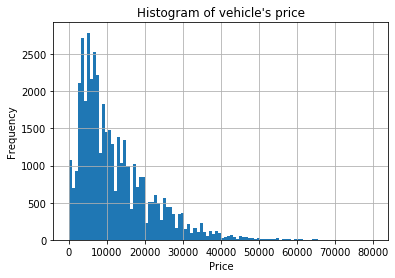

In [31]:
# plot a histogram of price. 
df['price'].hist(bins=100, range = [0, 80000])
# add title and axis names
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's price");

In [32]:
# statistics of 'price'
df['price'].describe()

count     43009.000000
mean      12168.670604
std       10019.342590
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

The histogram shows that the distribution is skewed right. Most car price fall in the low/medium range of price. The minimum price is 1 and maximum price is 375,000. The peak is around 5000. The histogram shows the data contains outliers on the 'tail'. 

### Histogram of vehicle's age

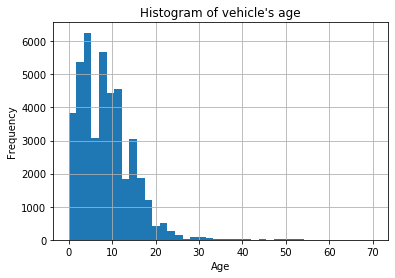

In [33]:
# plot a histogram of vehicle's age. 
df['vehicle_age'].hist(bins = 40, range = [0, 70])
# add title and axis names
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's age");

In [34]:
# statistics of 'vehicle_age'
df['vehicle_age'].describe()

count    43009.000000
mean         8.590481
std          6.219468
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

The histogram shows that the distribution is skewed right. Most vehicle age fall in 1 to 20 years. The minimun age is 1 and maximum age is 110. The median age is around 10. The peak is around 3 years. The histogram shows the data contains outliers on the 'tail'. 

### Histogram of odometer

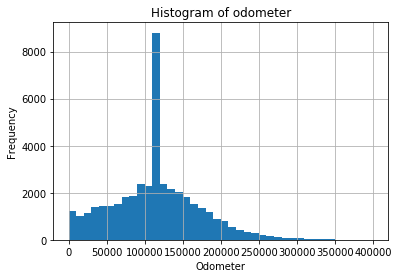

In [35]:
# plot a histogram of odometer. 
df['odometer'].hist(bins = 40, range = [0, 400000])
# add title and axis names
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title("Histogram of odometer");

In [36]:
# statistics of 'odometer'
df['odometer'].describe()

count     43009.000000
mean     114967.597038
std       59882.186015
min           0.000000
25%       78840.000000
50%      113000.000000
75%      146345.000000
max      990000.000000
Name: odometer, dtype: float64

The histogram shows that the distribution is skewed right. Most odometer fall in 0 to 200,000. The peak is around 130,000. The range of odometer is from 0 to 990,000. The median is around 120,000. The histogram shows the data contains outliers on the 'tail'. 

### Histogram of cylinders

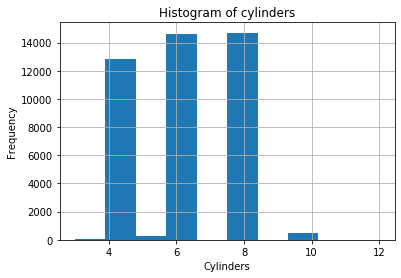

In [37]:
# plot a histogram of cylinders. 
df['cylinders'].hist(bins = 10)
# add title and axis names
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title("Histogram of cylinders");

In [38]:
# statistics of 'cylinders'
df['cylinders'].describe()

count    43009.000000
mean         6.126276
std          1.659540
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

The histogram shows the distribution of cylinders. We can see that most vehicles have 4, 6 and 8 cylinders. The minimum cylinder is 3 and maximum cylinder is 12. The median is around 6 cylinders, so we can imply that there are some outliers.

### Histogram of condition

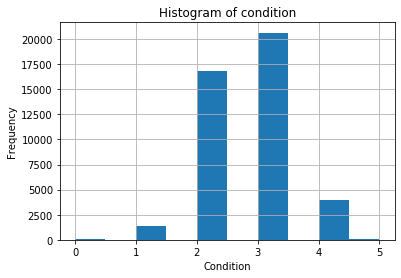

In [39]:
# plot a histogram of condition. 
df['condition'].hist(bins = 10)
# add title and axis names
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title("Histogram of condition");

In [40]:
# statistics of 'condition'
df['condition'].describe()

count    43009.000000
mean         2.637053
std          0.713040
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

The histogram shows the distribution of condition. We can see that most vehicles are 2(good) and 3(excellent). The minimum cylinder is 0(salvage) and maximum cylinder is 5(new). The median is around 3(good), so we can imply that there are some outliers.

### Processing outliers

In [41]:
# let's see our unfiltered data
df[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']].describe()

,price,vehicle_age,odometer,cylinders,condition
count,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000
mean,12168.670604,8.590481,114967.597038,6.126276,2.637053
std,10019.342590,6.219468,59882.186015,1.659540,0.713040
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,78840.000000,4.000000,2.000000
50%,9000.000000,7.000000,113000.000000,6.000000,3.000000
75%,16900.000000,12.000000,146345.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


After plotting histograms, we know that 'price', 'vehicle_age', and 'odometer' have outliers. Thus we need to detect and remove them before doing further analysis.

We will use IQR rule to detect outliers. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

In [42]:
# Limits of outliers. 
cols = ['price', 'vehicle_age', 'odometer']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

price          11900.0
vehicle_age        8.0
odometer       67505.0
dtype: float64

The interquartile range of price is 10987, vehicle's age is 8, and odometer is 64000.

In [43]:
# Outliers lower limit
lower_lim = Q1 - 1.5 * IQR
# Outliers upper limit
upper_lim = Q3 + 1.5 * IQR
print("Lower limits are\n", lower_lim)
print("Upper limits are\n", upper_lim)

Lower limits are
 price         -12850.0
vehicle_age       -8.0
odometer      -22417.5
dtype: float64
Upper limits are
 price           34750.0
vehicle_age        24.0
odometer       247602.5
dtype: float64


We can see our lower limits of price is -11482.5, vehicle'age is -8, and odometer is -11000. Upper limits of price is 32465, vehicle's age is 24, and odometer is 245000. 

In [44]:
# Check our dataset before dropping outliers
print("Old Shape: ", df.shape) 

Old Shape:  (43009, 19)


Outliers are those data less than lower boundary and greater than upper boundary. 

In [45]:
# Check number of outliers
df[((df[cols] < lower_lim) |(df[cols] > upper_lim)).any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile
30,3890,2011,subaru outback,3,4,gas,300000,automatic,SUV,white,True,2018-12-25,31,Tuesday,52,December,2018,7,42857
37,34900,2013,mercedes-benz benze sprinter 2500,3,6,diesel,113000,automatic,van,black,False,2019-01-15,16,Tuesday,3,January,2019,6,18833
40,2400,2001,toyota camry,2,4,gas,277564,automatic,coupe,yellow,False,2018-05-27,51,Sunday,21,May,2018,17,16327
44,3200,2006,honda civic,3,4,gas,255390,automatic,sedan,blue,False,2018-10-18,23,Thursday,42,October,2018,12,21282
86,39950,2018,chevrolet silverado,3,8,gas,18500,automatic,truck,others,True,2018-08-05,16,Sunday,31,August,2018,1,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42834,34995,2014,ford mustang,4,8,gas,7950,manual,coupe,black,False,2018-07-11,57,Wednesday,28,July,2018,4,1987
42857,40990,2016,ram 1500,3,8,diesel,107930,automatic,truck,white,True,2019-03-17,23,Sunday,11,March,2019,3,35976
42950,2000,1993,jeep grand cherokee laredo,1,6,gas,141669,automatic,SUV,green,True,2019-02-16,25,Saturday,7,February,2019,26,5448
42954,35500,2015,gmc sierra 2500hd,2,8,diesel,106973,automatic,truck,black,True,2018-05-04,15,Friday,18,May,2018,3,35657


We know we have 2751 rows contains outliers. Let's drop them. 

In [46]:
# Dropping out the outliers
df_new = df[~((df[cols] < lower_lim) |(df[cols] > upper_lim)).any(axis=1)]
# New dataset's shape
print("New Shape: ", df_new.shape) 

New Shape:  (40069, 19)


Our new dataset contains 38319 rows.

### New histograms after filtering outliers

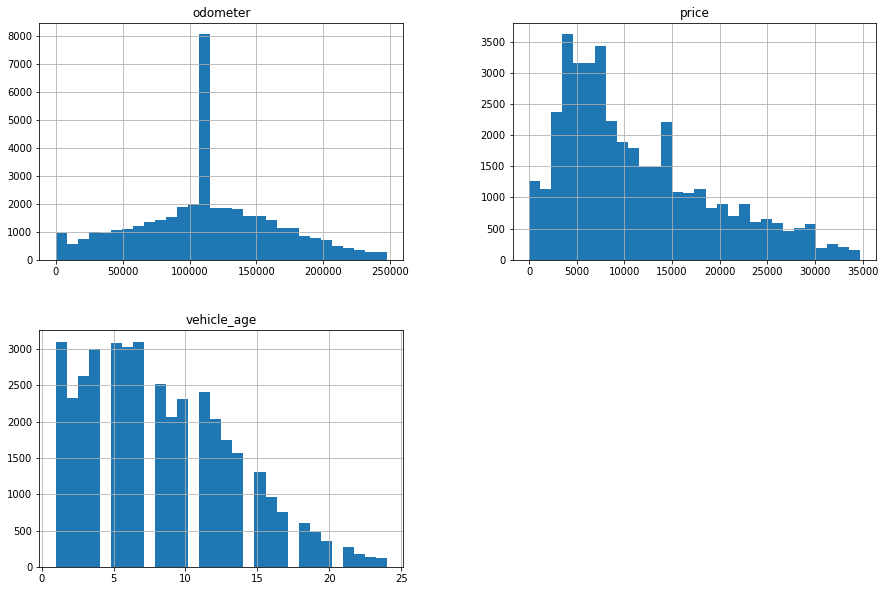

In [47]:
# New histograms after dropping outliers
df_new[cols].hist(bins = 30, figsize=(15, 10));

In [48]:
# check out our statistics of columns after filtering outliers
df_new[cols].describe()

,price,vehicle_age,odometer
count,40069.000000,40069.000000,40069.000000
mean,11296.751404,8.251067,112863.423020
std,7845.725595,5.125203,51819.219054
min,1.000000,1.000000,0.000000
25%,5000.000000,4.000000,81256.000000
50%,8995.000000,7.000000,113000.000000
75%,15995.000000,12.000000,144400.000000
max,34700.000000,24.000000,247548.000000


### Conclusion

Our outliers (2751 rows) have been removed, our new dataset has 38319 rows. Comparing the histograms, we observed that long 'tails' are not exist anymore, the distributions are almost normal distributions. Also, 50% percentiles are close to the mean value. We successfully removed our outliers from the dataset. 

### Number of days advertisements were displayed

#### Statistics of days displayed

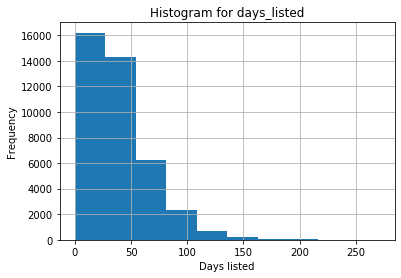

In [49]:
# plot a histogram for days_listed
df_new['days_listed'].hist()
# add title and axis names
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title("Histogram for days_listed");

In [50]:
# check the statistics of days listed
df_new['days_listed'].describe()

count    40069.000000
mean        39.567571
std         28.207308
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [51]:
# median value of days listed
df_new['days_listed'].median()

33.0

The histogram above shows the distribution of days vehicle was listed after dropping out outliers. The mean value is 39 days and median is 33 days. The minimum and maximum days are 0 and 271, respectively. The 50% percentile is 33 days, close to the mean value. The days listed numbers match our rea-world scenarios. 

#### Vehicles with shortest and long display time

In [52]:
# check vehicles with 1 day or less display time
temp = df_new.query('days_listed <= 1')
temp

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile
34,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,True,2019-03-31,1,Sunday,13,March,2019,10,23400
397,8990,2016,nissan rogue,3,4,gas,121635,automatic,SUV,grey,False,2018-12-14,1,Friday,50,December,2018,2,60817
699,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,others,False,2018-05-24,1,Thursday,21,May,2018,2,2499
787,6995,2005,subaru outback,3,4,gas,113000,automatic,wagon,green,True,2018-06-05,1,Tuesday,23,June,2018,13,8692
1067,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,True,2018-05-15,0,Tuesday,20,May,2018,10,9330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41191,5900,2010,kia soul,2,4,gas,144817,other,wagon,red,False,2018-11-28,1,Wednesday,48,November,2018,8,18102
41792,2500,1999,gmc sierra 1500,2,8,gas,216000,automatic,pickup,white,False,2019-02-02,1,Saturday,5,February,2019,20,10800
42638,3500,2010,nissan altima,2,4,gas,167800,automatic,sedan,custom,False,2019-02-01,1,Friday,5,February,2019,9,18644
42871,2999,2004,ford taurus,2,6,gas,136000,automatic,sedan,others,False,2018-10-22,0,Monday,43,October,2018,14,9714


In [53]:
# Average ads removed quickly is 18 hours. 
temp['days_listed'].mean()*24

18.728323699421964

In [54]:
# check vehicles more than 100 days display time
df_new.query('days_listed >= 100')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile
13,17990,2013,ram 1500,3,8,gas,113000,automatic,pickup,red,True,2018-05-15,111,Tuesday,20,May,2018,5,22600
25,29800,2012,chevrolet corvette,3,8,gas,57413,automatic,coupe,orange,False,2018-10-22,101,Monday,43,October,2018,6,9568
31,9500,2008,toyota highlander,2,6,gas,149799,automatic,SUV,others,False,2018-06-04,121,Monday,23,June,2018,10,14979
46,3800,2012,ford focus,2,4,gas,130323,automatic,sedan,black,False,2018-11-29,261,Thursday,48,November,2018,6,21720
76,18800,2015,chevrolet camaro lt coupe 2d,2,6,gas,33926,other,coupe,grey,False,2019-01-16,152,Wednesday,3,January,2019,4,8481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42868,10988,2010,dodge grand caravan,2,6,gas,49208,automatic,van,white,False,2018-09-17,102,Monday,38,September,2018,8,6151
42882,9700,2010,honda odyssey,2,6,gas,105656,automatic,mini-van,grey,False,2019-01-18,111,Friday,3,January,2019,9,11739
42905,5495,2006,jeep liberty,2,6,gas,108388,automatic,wagon,white,True,2018-12-24,106,Monday,52,December,2018,12,9032
42974,1200,2005,volkswagen jetta,1,5,gas,185000,automatic,sedan,grey,False,2018-10-10,158,Wednesday,41,October,2018,13,14230


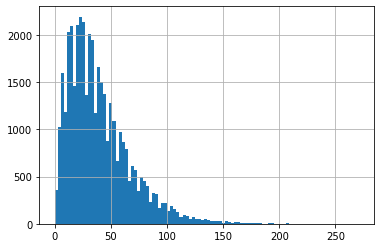

In [55]:
# plot the histogram of days_listed
df_new['days_listed'].hist(bins = 100);

We observed that 165 vehicles are sold very quickly (18 hours avg.) after displaying and 1528 vehicles are sold 100 days after displaying. The longest days is 271 days, which is normal. Although the average days is 39 days, all the data of days listed are appropirate numbers and match our real-world situation. Observing from the above histogram, the typical display time of a vehicle is 7 to 100 days. 

### Analyze the number of ads and the average price for each type of vehicle. 

#### Aggregate of data by vehicle type and days listed

In [56]:
# In the previous analysis, we conclude that the typical display time is 7 to 100 days. 
vehicle_days_listing = df_new.pivot_table(index='type', values='days_listed', aggfunc=['mean', 'count'])
vehicle_days_listing.columns = ['mean_days_listed', 'vehicle_num']
vehicle_days_listing.sort_values(by = 'vehicle_num', ascending = False)
                                                                           

,mean_days_listed,vehicle_num
type,,
sedan,39.360361,9965
SUV,39.953013,9875
truck,39.239325,9180
pickup,39.384259,5184
coupe,38.882935,1717
wagon,40.644301,1237
mini-van,39.173220,941
hatchback,41.469939,815
van,41.412955,494


#### Calculate the average price per brand

In [57]:
brand_avg_price = df_new.pivot_table(index='type', values = 'price', aggfunc = 'mean')
brand_avg_price.sort_values(by = 'price', ascending = False)


,price
type,
bus,18340.294118
pickup,15257.670332
truck,15185.251416
offroad,14403.452229
coupe,13470.222481
convertible,12862.092715
other,10723.145946
SUV,10511.670481
wagon,9022.509297


#### Join aggregate of days listed, vehicle count with the average price

In [58]:
brand_listing_info = vehicle_days_listing.join(brand_avg_price, on = 'type').reset_index()
brand_listing_info

,type,mean_days_listed,vehicle_num,price
0,SUV,39.953013,9875,10511.670481
1,bus,45.176471,17,18340.294118
2,convertible,38.771523,302,12862.092715
3,coupe,38.882935,1717,13470.222481
4,hatchback,41.469939,815,6770.365644
5,mini-van,39.173220,941,8113.565356
6,offroad,42.401274,157,14403.452229
7,other,37.810811,185,10723.145946
8,pickup,39.384259,5184,15257.670332
9,sedan,39.360361,9965,7032.667336


#### Plot graphs showing the dependence of the number of ads on the vehicle type. 

In [59]:
# correlation showing the relationship between number of ads and price
brand_listing_info['price'].corr(brand_listing_info['vehicle_num'])

-0.0661567130628376

From the calculation above, we observed that there is no relationship between number of ads and vehicle's price. 

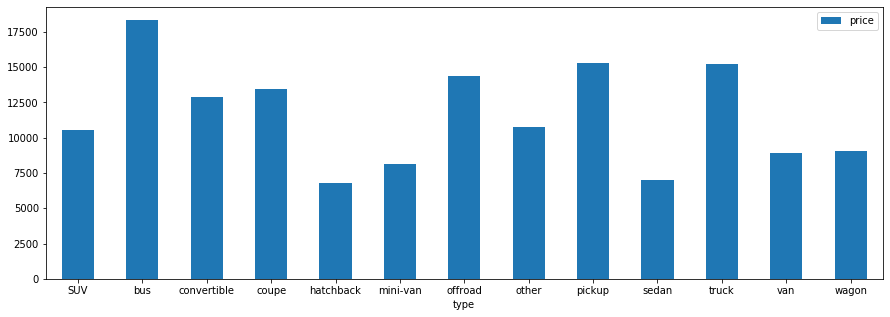

In [60]:
# a bar plot of vehicle type and price
ax = brand_listing_info.plot.bar(x = 'type', y = 'price', rot = 0, figsize = (15,5))

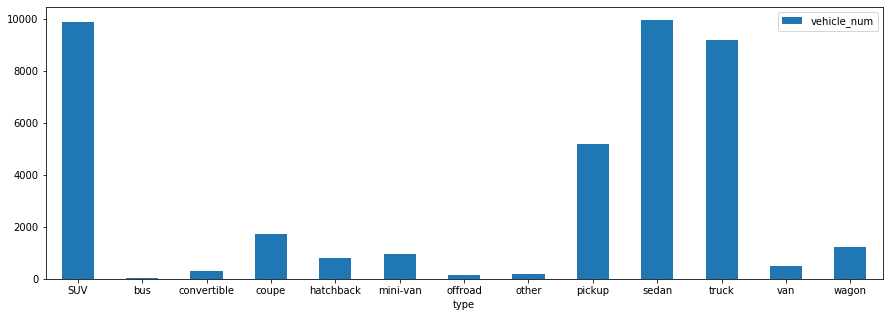

In [61]:
# a bar plot of vehicle type and number of ads
ax2 = brand_listing_info.plot.bar(x = 'type', y = 'vehicle_num', rot = 0, figsize = (15,5))

### Conclusion

We determined that the two types with the greatest number of ads are the **sedan and SUV**. We also found that the two types with the highest mean price are the bus and truck. We calculated the correlation of number of ads and price, and we found there no relationship between them. 

### Determine factors impact the price most

In [62]:
# check types with the greatest number of ads.
df_new['type'].value_counts()

sedan          9965
SUV            9875
truck          9180
pickup         5184
coupe          1717
wagon          1237
mini-van        941
hatchback       815
van             494
convertible     302
other           185
offroad         157
bus              17
Name: type, dtype: int64

We found that sedan has the most numbe of ads, followed by SUV, truck and pickup. Bus has the least number of ads. 

In [63]:
# select top 2 vehicle types with most ads
df_top = df_new[df_new.type.isin(['sedan', 'SUV'])]
df_top.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,week,month,year,vehicle_age,avg_mile
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,Saturday,25,June,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,6,February,2019,6,18333
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,14,April,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,25,June,2018,4,14488
5,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,52,December,2018,3,26404


In [64]:
# make analysis of sedan and SUV separately
df_sedan = df_top[df_top['type'] == 'sedan']
df_SUV = df_top[df_top['type'] == 'SUV']

#### Age and price

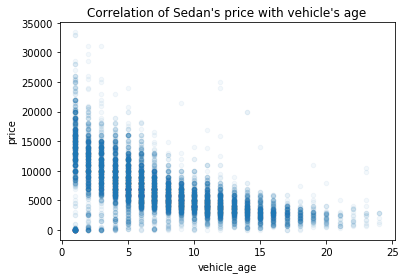

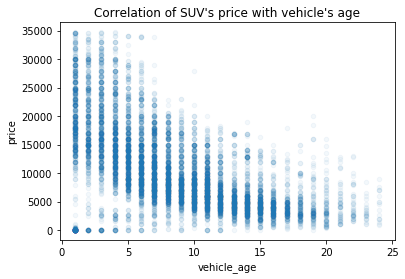

In [65]:
df_sedan.plot.scatter(x = 'vehicle_age', y = 'price', title = "Correlation of Sedan's price with vehicle's age", alpha = 0.05);
df_SUV.plot.scatter(x = 'vehicle_age', y = 'price', title = "Correlation of SUV's price with vehicle's age", alpha = 0.05);


In [66]:
# Correlation coefficient between vehicle's age and price of sedan.
print('Sedan R = ', df_sedan['vehicle_age'].corr(df['price']))
print('SUV R = ', df_SUV['vehicle_age'].corr(df['price']))

Sedan R =  -0.6360356445792139
SUV R =  -0.600128134541371


From the scatterplot of vehicle's age and price, we observed that the price has negative relation with vehicle's age for both sedan and SUV. Price tend to increase when vehicle's age decreases. 

#### Mileage and price

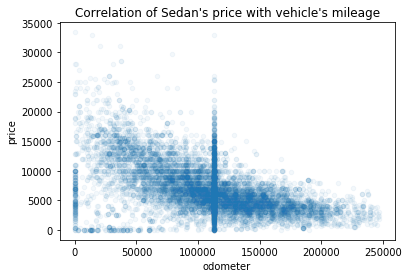

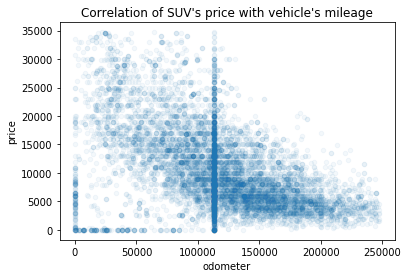

In [67]:
df_sedan.plot.scatter(x = 'odometer', y = 'price', title = "Correlation of Sedan's price with vehicle's mileage", alpha = 0.05);
df_SUV.plot.scatter(x = 'odometer', y = 'price', title = "Correlation of SUV's price with vehicle's mileage", alpha = 0.05);


In [68]:
# Correlation coefficient between vehicle's mileage and price of sedan.
print('Sedan R = ', df_sedan['odometer'].corr(df['price']))
print('SUV R = ', df_SUV['odometer'].corr(df['price']))

Sedan R =  -0.5034156928616461
SUV R =  -0.4737177759901828


From the scatterplot of vehicle's mileage and price, we observed that the price has negative relation with vehicle's mileage. Price tend to incrase when vehicle's mileage decreases. 

#### Condition and price

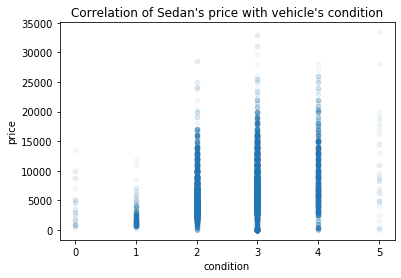

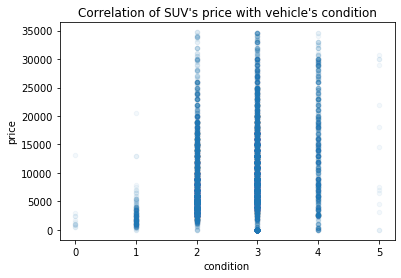

In [69]:
df_sedan.plot.scatter(x = 'condition', y = 'price', title = "Correlation of Sedan's price with vehicle's condition", alpha = 0.05);
df_SUV.plot.scatter(x = 'condition', y = 'price', title = "Correlation of SUV's price with vehicle's condition", alpha = 0.05);

From the scatterplot of vehicle's condition and price, we observed that vehicle with good(2), excellent(3), and like-new(4) have higher price than vehicles with other conditions. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


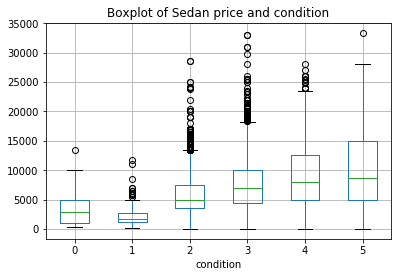

In [70]:
# the box plot of sedan price and condition
df_sedan.boxplot(by = 'condition', column='price')
# add title
plt.title('Boxplot of Sedan price and condition')
plt.suptitle("")
plt.show();

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


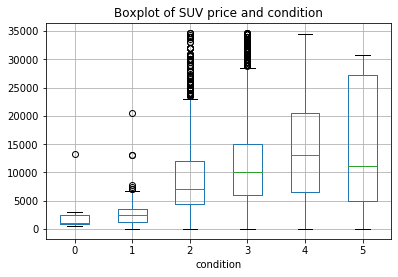

In [71]:
# the box plot of sedan price and condition
df_SUV.boxplot(by = 'condition', column='price')
# add title
plt.title('Boxplot of SUV price and condition')
plt.suptitle("")
plt.show();

From the box plot we observed that vehicles with fair(1) condition has the least price for sedans, and salvage(0) has the least price for SUVs. Vehicles with like-new(4) condition has the most price for both types of vehicles. This indicates that the condition has a big influence on the price.

#### Transmission type and price

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


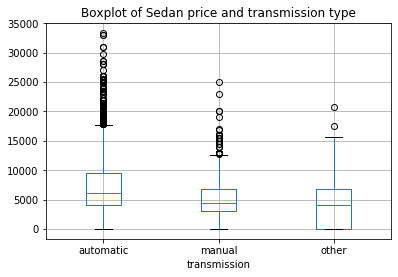

In [72]:
# the box plot of Sedan price and transmission type
df_sedan.boxplot(by = 'transmission', column='price')
# add title
plt.title('Boxplot of Sedan price and transmission type')
plt.suptitle("")
plt.show();

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


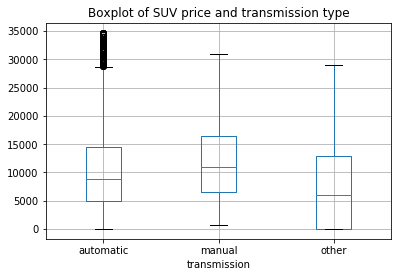

In [73]:
# the box plot of SUV price and transmission type
df_SUV.boxplot(by = 'transmission', column='price')
# add title
plt.title('Boxplot of SUV price and transmission type')
plt.suptitle("")
plt.show();

From the box plot we observed that transmission type has influence on vehicle's price. Sedans with automatic transmission have higher price than vehicles with manual transmission, while SUVs with manual transmission have higher price. We can conclude that sedans with automatic transmission tend to cost more than manual transmission vehicles, and SUVs has the opposite conclusion. Thus, transmission type has big influence on price. 

#### Color and price

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


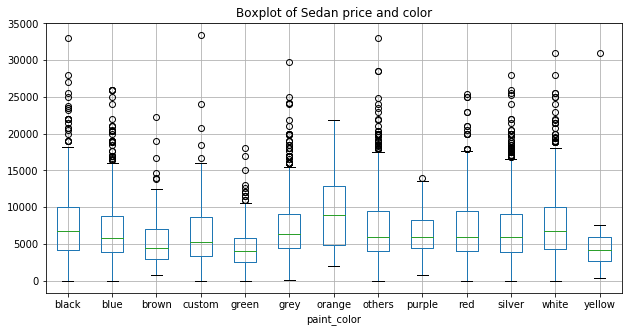

In [74]:
# the box plot of Sedan price and color
df_sedan.boxplot(by = 'paint_color', column='price', figsize = (10,5))
# add title
plt.title('Boxplot of Sedan price and color')
plt.suptitle("")
plt.show();

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


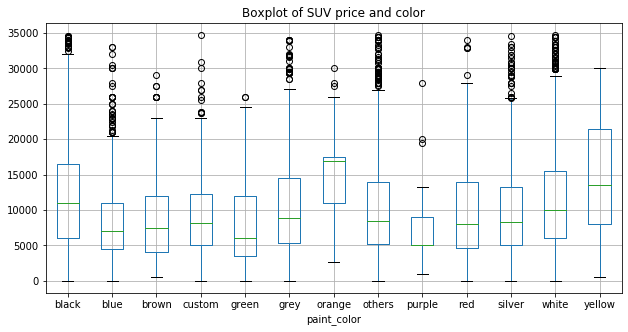

In [75]:
# the box plot of SUV price and color
df_SUV.boxplot(by = 'paint_color', column='price', figsize = (10,5))
# add title
plt.title('Boxplot of SUV price and color')
plt.suptitle("")
plt.show();

From the boxplot of paint color and price, there isn't exsit any price difference based on difference color. Also, there are outliers exist in many colors. Thus, we can conclude that vehicle's color doesn't impact the price. 

### Conclusion

After selecting top five vehicles with most ads, we analyzed correlation of price with age, mileage, codition, transimission type, and paint color. We found that price has negative relation with age and mileage. That is, price will increase when age and mileage decrease. Vehicle's condition is an important factor, vehicles with good(2), excellent(3), and like-new(4) have higher price than vehicles with other conditions. Particularly, vehicles with fair(1) have least price for sedans and salvage(0) for SUVs. Moreoever, transmission type is another important factor, sedans with automatic transmission has higher price than sedans with other transmissions. SUVs with manual transmission has higher price than SUVs with other transmissions. From the boxplot we observed that vehicle's paint color doesn't impact on the price.    

## Overall conclusion

For the data processing stage, we processed the missing values. We dropped out missing values in 'model_year' and 'cylinders'. For 'odometer' we replaced missing values with the median value. For 'paint_color', we replace missing value with 'others'. And we changed all the columns with float data type to integers. 

We calculated 'dayofweek', 'month', 'year', 'age'and 'avg_mile', and add them into the dataset. 

In carry out exploratory data analysis stage, we check out the correlation among price, vehicle's age when the ad was placed, mileage, number of cylinders, and vehicle's condition. We found significant outliers existed in 'price', 'odometer', and 'age'. After we detect the outliers, we dropped out the outliers and create a new dataset.

After analyzing the number of days the ads were displayed we identified a typical listing period is 7 to 100 days. The maximum days listed is 271 days. Minumum days is 0 day, specifically, an average of 18 hours. 

We know sedan and SUV has the most number of ads posted, bus and truck has the most price.

After plotting box plots and scatter plots, we observed that vehicle's codition and transmission type have huge impact on vehicle's price, and vehicle's age, mileage, color also are factors that can predict price. 

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn